In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading training features into a dataframe and previewing first five rows
train_features_df = pd.read_csv("training_set_features.csv",index_col = "respondent_id")
train_features_df.head()

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [3]:
# loading training labels into a dataframe and previewing first five rows
train_label_df = pd.read_csv("training_set_labels.csv",index_col = "respondent_id")
train_label_df.head()

,xyz_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


In [4]:
# assert that the respondent_id in features and labels column are the same in order to merge
assert train_features_df.index.equals(train_label_df.index)

In [5]:
# joining the two dataframes
data = train_features_df.join(train_label_df)
data.shape

(26707, 37)

In [6]:
data.tail()

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,xyz_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,0,0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0,0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,1
26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,...,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,0,0
26706,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Own,Not in Labor Force,mlyzmhmf,"MSA, Principle City",1.0,0.0,NaN,NaN,0,0


In [7]:
# previewing the datatypes
data.dtypes

xyz_concern                    float64
xyz_knowledge                  float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_xyz                float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_xyz_vacc_effective     float64
opinion_xyz_risk               float64
opinion_xyz_sick_from_vacc     float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
income_poverty           

In [8]:
data.duplicated().sum()

0

In [9]:
# checking for distribution of target ie h1n1_vaccine and seasonal vaccine
print(f"Count of people vaccinated against H1N1: \n{data.xyz_vaccine.value_counts()}\n")
print(f"Percentage of people vaccinated against H1N1: \n{data.xyz_vaccine.value_counts(normalize = True)}\n")
print(f"Count of people vaccinated against seasonal flu: \n{data.seasonal_vaccine.value_counts()}\n")
print(f"Percentage of people vaccinated against seasonal flu: \n{data.seasonal_vaccine.value_counts(normalize = True)}\n")

Count of people vaccinated against H1N1: 
xyz_vaccine
0    21033
1     5674
Name: count, dtype: int64

Percentage of people vaccinated against H1N1: 
xyz_vaccine
0    0.787546
1    0.212454
Name: proportion, dtype: float64

Count of people vaccinated against seasonal flu: 
seasonal_vaccine
0    14272
1    12435
Name: count, dtype: int64

Percentage of people vaccinated against seasonal flu: 
seasonal_vaccine
0    0.534392
1    0.465608
Name: proportion, dtype: float64



In [10]:
data.columns

Index(['xyz_concern', 'xyz_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'xyz_vaccine', 'seasonal_vaccine'],
      dtype='object')

In [11]:
data.isnull().sum()

xyz_concern                       92
xyz_knowledge                    116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_xyz                 2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_xyz_vacc_effective       391
opinion_xyz_risk                 388
opinion_xyz_sick_from_vacc       395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

####Exploratory data Analysis

C:\Users\hp\AppData\Local\Temp\ipykernel_4052\2810022652.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x,y=y,palette="summer",ax=ax) # plotting the barchart
C:\Users\hp\AppData\Local\Temp\ipykernel_4052\2810022652.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x,y=y,palette="summer",ax=ax) # plotting the barchart
C:\Users\hp\AppData\Local\Temp\ipykernel_4052\2810022652.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x,y=y,palette="summer",ax=ax) # plotting the barchart
C:\Users\hp\AppData\Local\Temp\ipykernel_4052\281

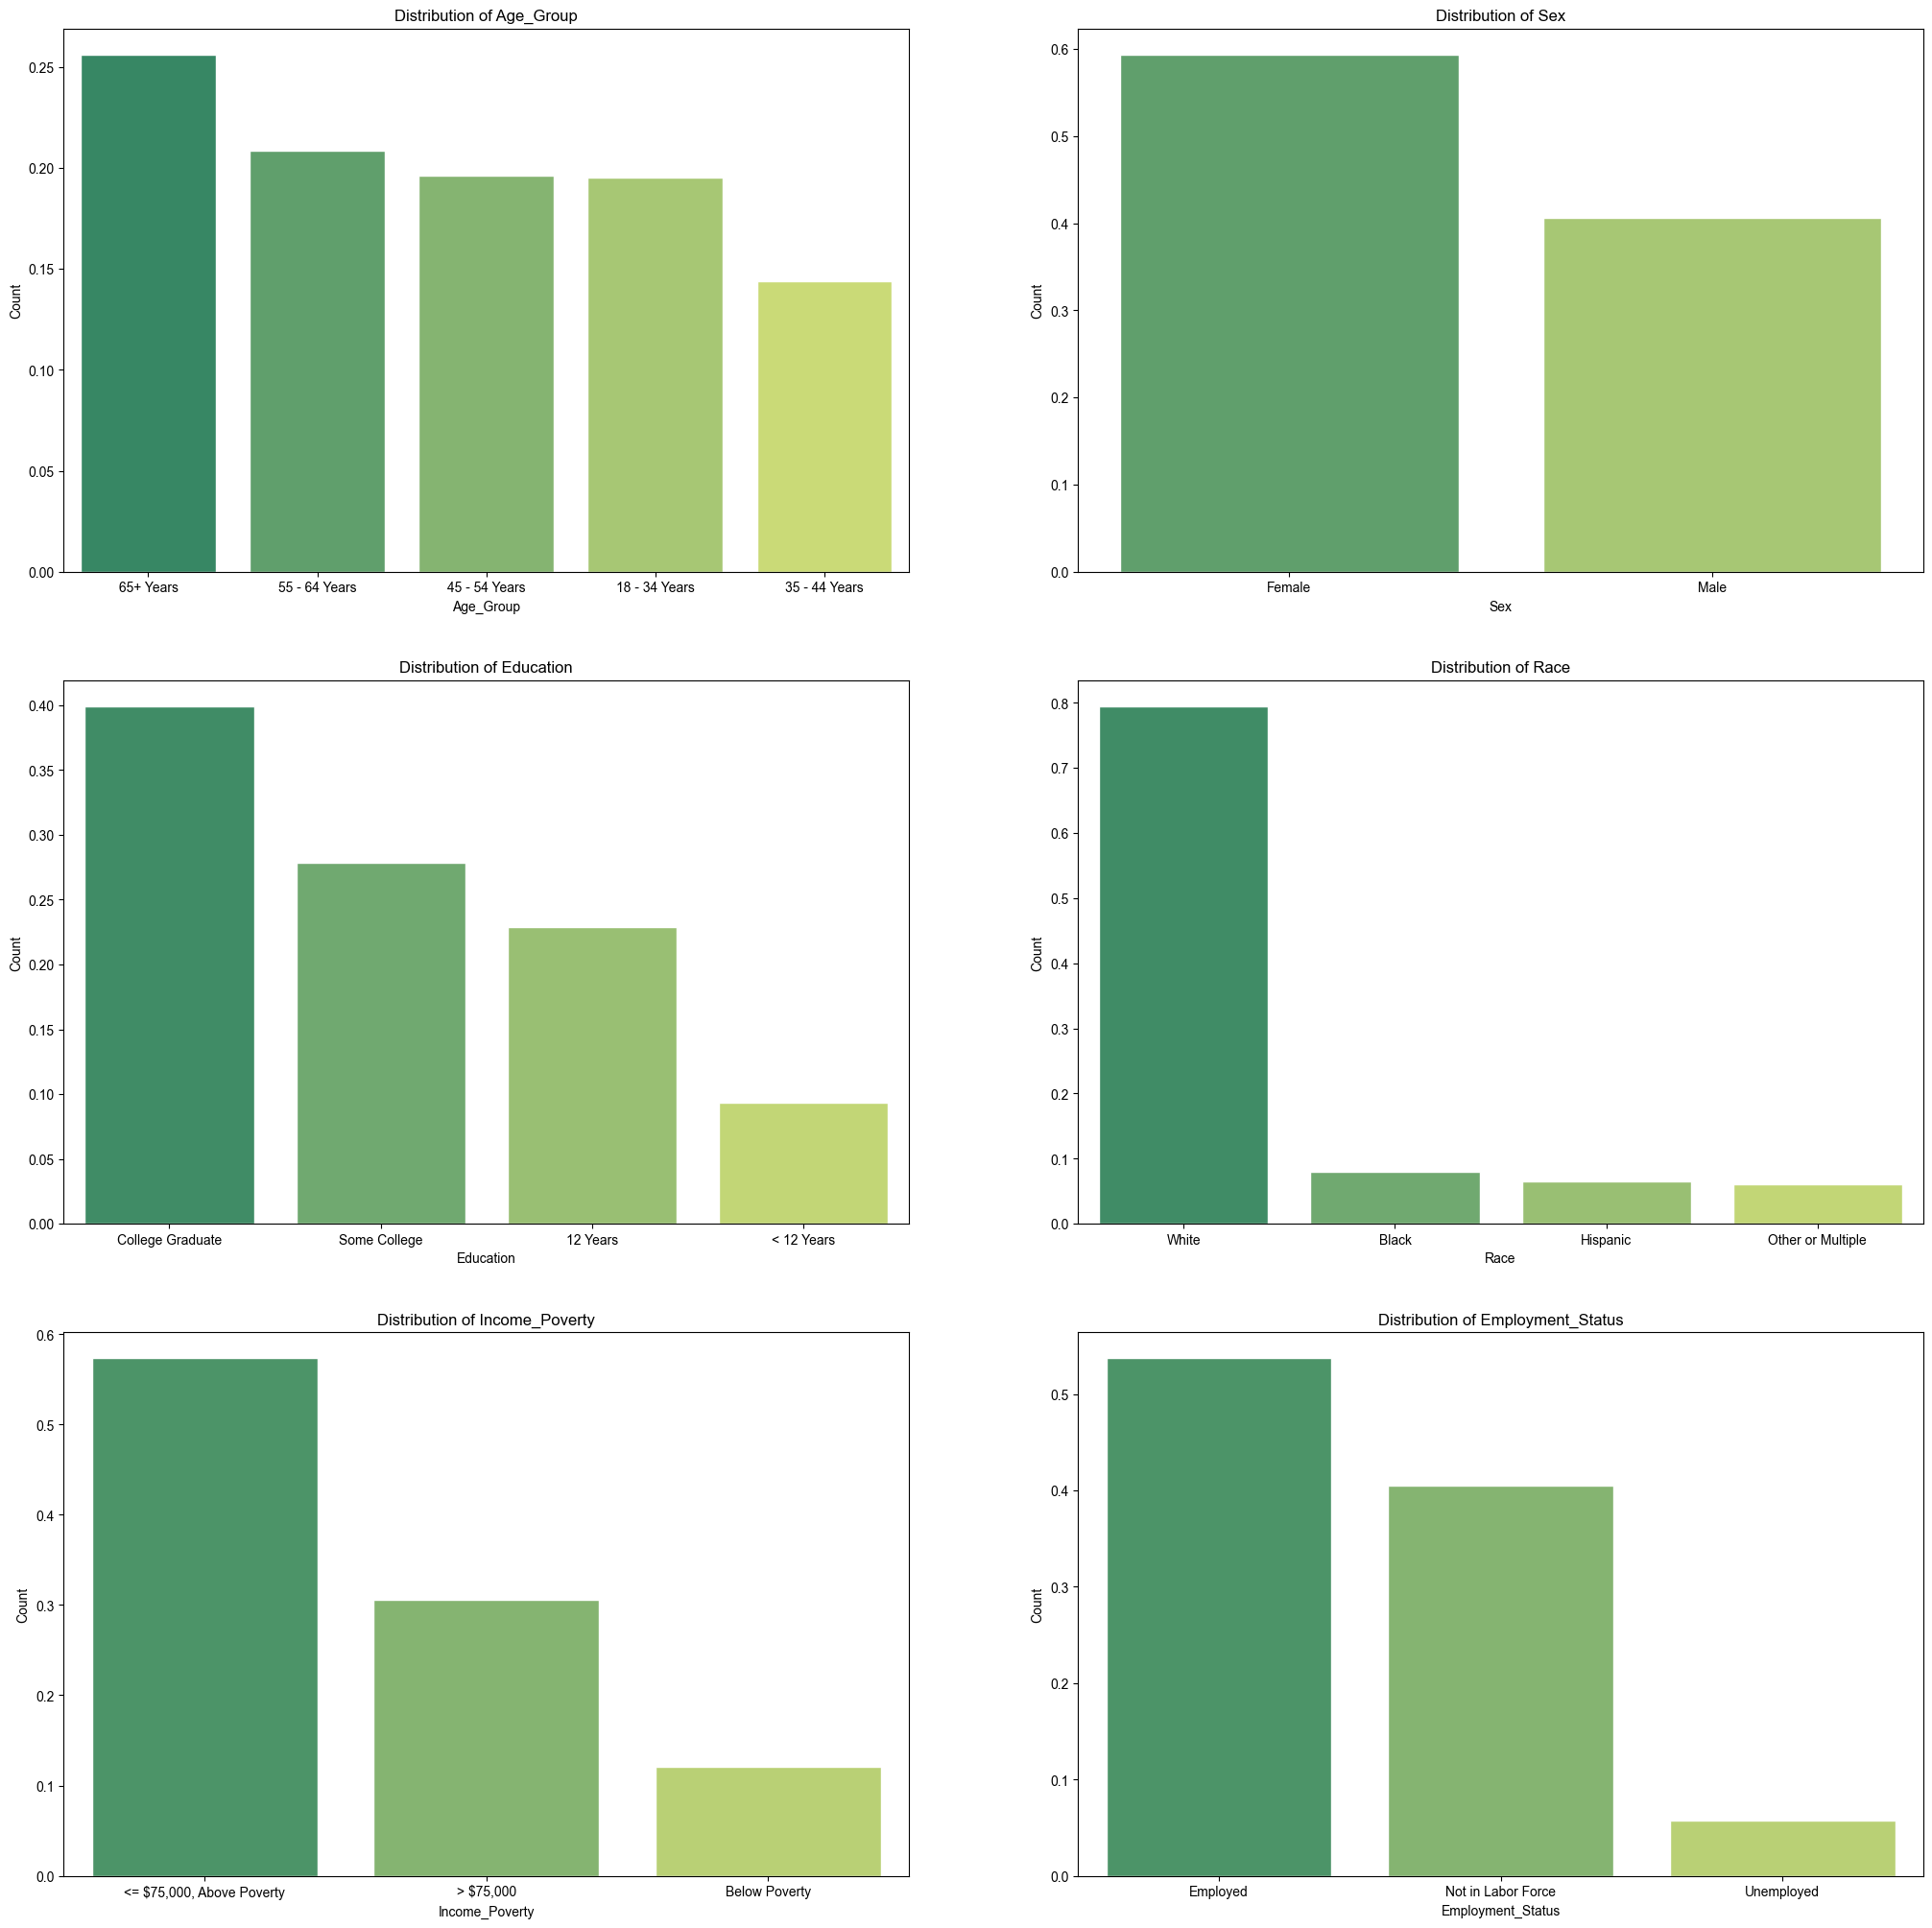

In [12]:
# adding columns to plot to a list
columns = ["age_group","sex","education","race","income_poverty","employment_status"]

# setting style,axes and figsize
fig,axes = plt.subplots(figsize = (25,25),nrows = 3,ncols = 2)
sns.set_style("whitegrid")

for i,col in enumerate(columns):
    
    # defining the axis for plotting
    row = i//2
    column = i%2
    ax = axes[row][column]

    # defining x and y for the barchart
    x = data[col].value_counts(normalize=True).index
    y = data[col].value_counts(normalize=True)

    sns.barplot(x=x,y=y,palette="summer",ax=ax) # plotting the barchart

    ax.set_xlabel(f"{col.title()}") # setting the respective labels
    ax.set_ylabel("Count")
    ax.set_title(f"Distribution of {col.title()}");

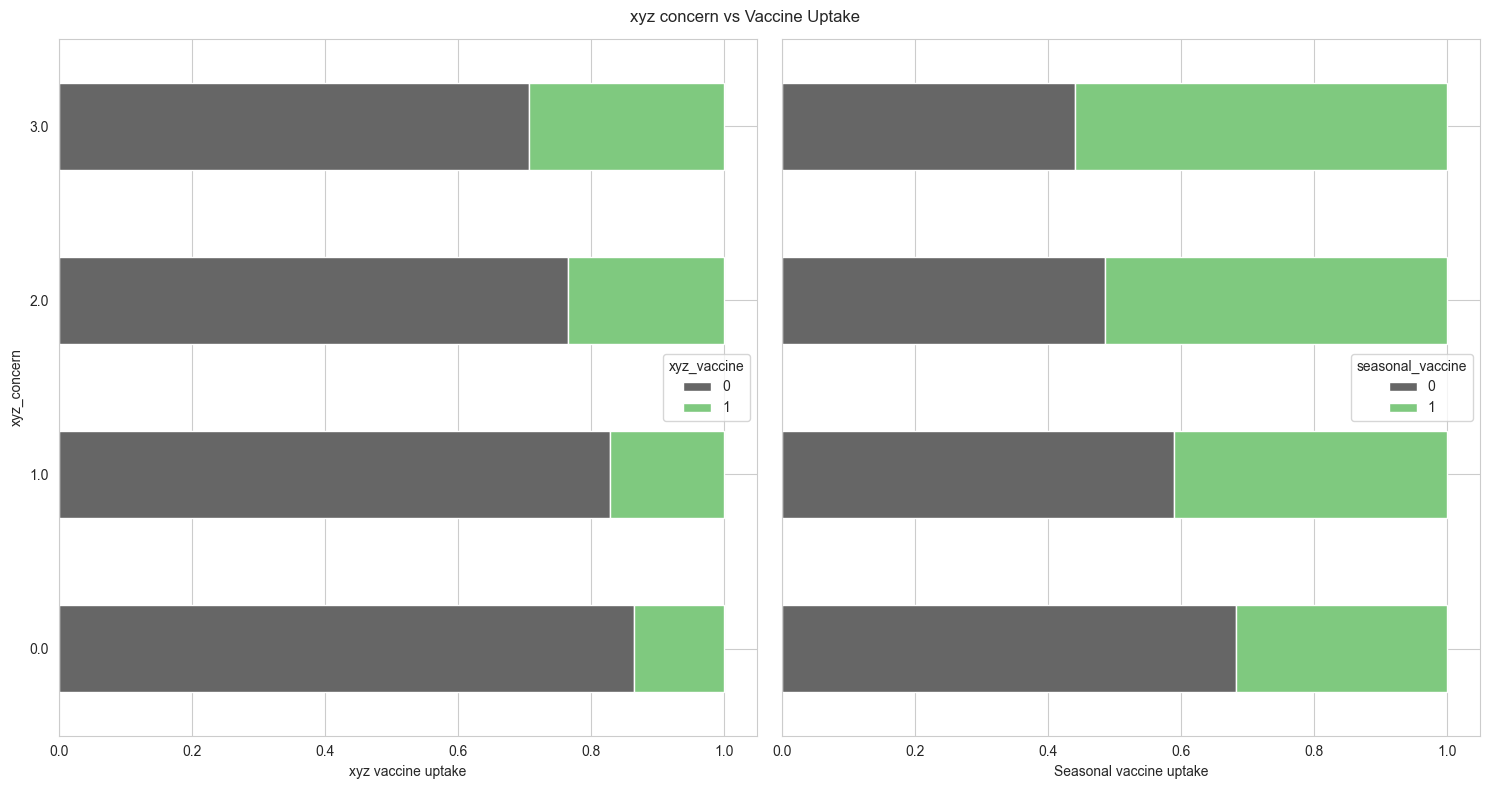

In [13]:
my_cmap = sns.color_palette("Accent_r",as_cmap=True)
fig,(ax_1,ax_2) = plt.subplots(figsize = (15,8),ncols = 2,sharey = True)

crosstab_concern1 = pd.crosstab(data["xyz_concern"],data['xyz_vaccine'],normalize="index")
crosstab_concern1.plot(kind = "barh",stacked = True,colormap=my_cmap,ax = ax_1)
crosstab_concern2 = pd.crosstab(data["xyz_concern"],data['seasonal_vaccine'],normalize="index")
crosstab_concern2.plot(kind = "barh",stacked = True,colormap=my_cmap,ax = ax_2)
ax_1.set_xlabel("xyz vaccine uptake")
ax_2.set_xlabel("Seasonal vaccine uptake")

fig.suptitle("xyz concern vs Vaccine Uptake")
fig.tight_layout()

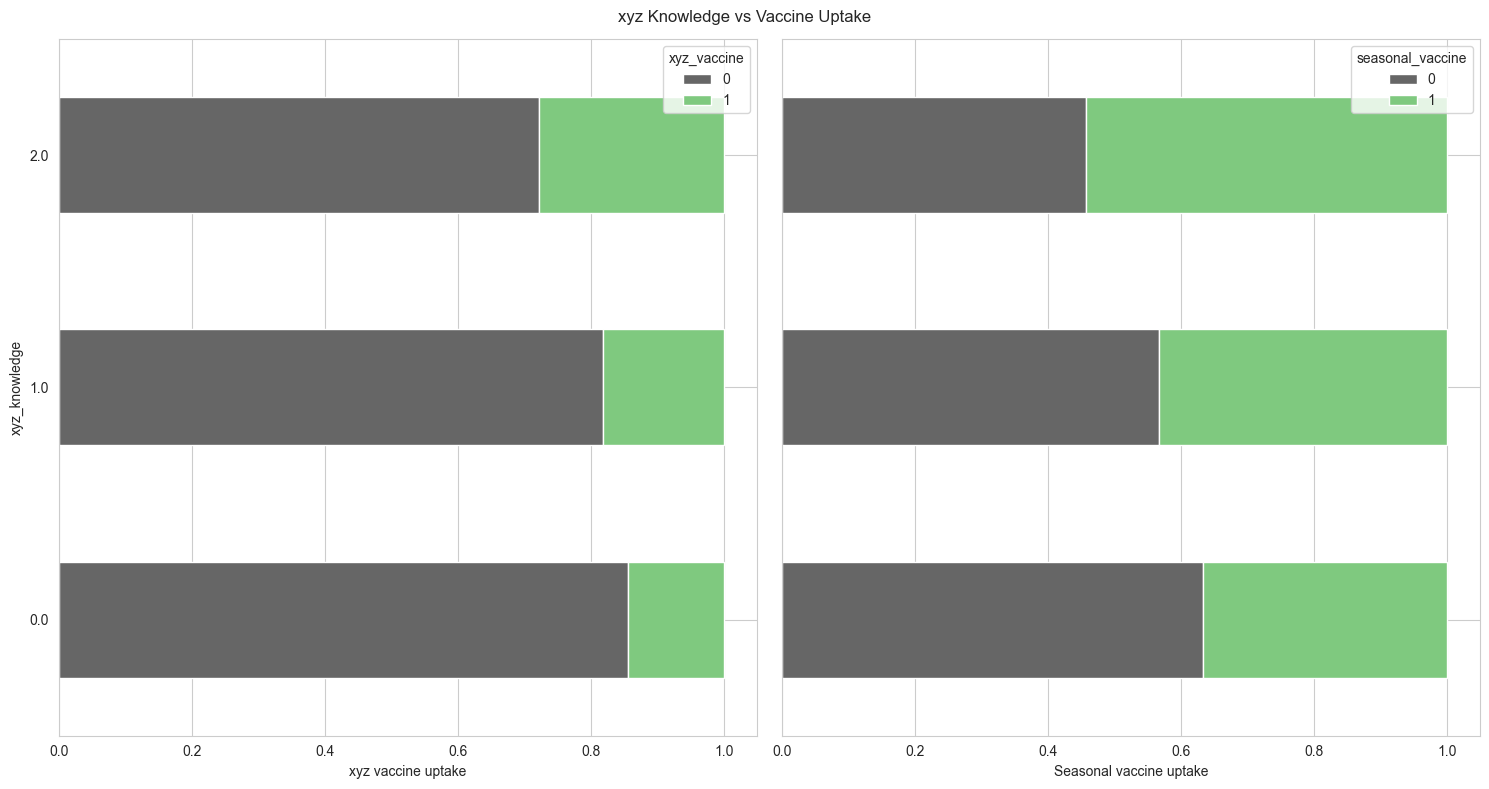

In [14]:
fig,(ax_1,ax_2) = plt.subplots(figsize = (15,8),ncols = 2,sharey = True)

crosstab_know1 = pd.crosstab(data["xyz_knowledge"],data['xyz_vaccine'],normalize="index")
crosstab_know1.plot(kind = "barh",stacked = True,colormap=my_cmap,ax = ax_1)
crosstab_know2 = pd.crosstab(data["xyz_knowledge"],data['seasonal_vaccine'],normalize="index")
crosstab_know2.plot(kind = "barh",stacked = True,colormap=my_cmap,ax = ax_2)
ax_1.set_xlabel("xyz vaccine uptake")
ax_2.set_xlabel("Seasonal vaccine uptake")

fig.suptitle("xyz Knowledge vs Vaccine Uptake")
fig.tight_layout()

##Relationship between gender, race, age group and vaccine uptake?

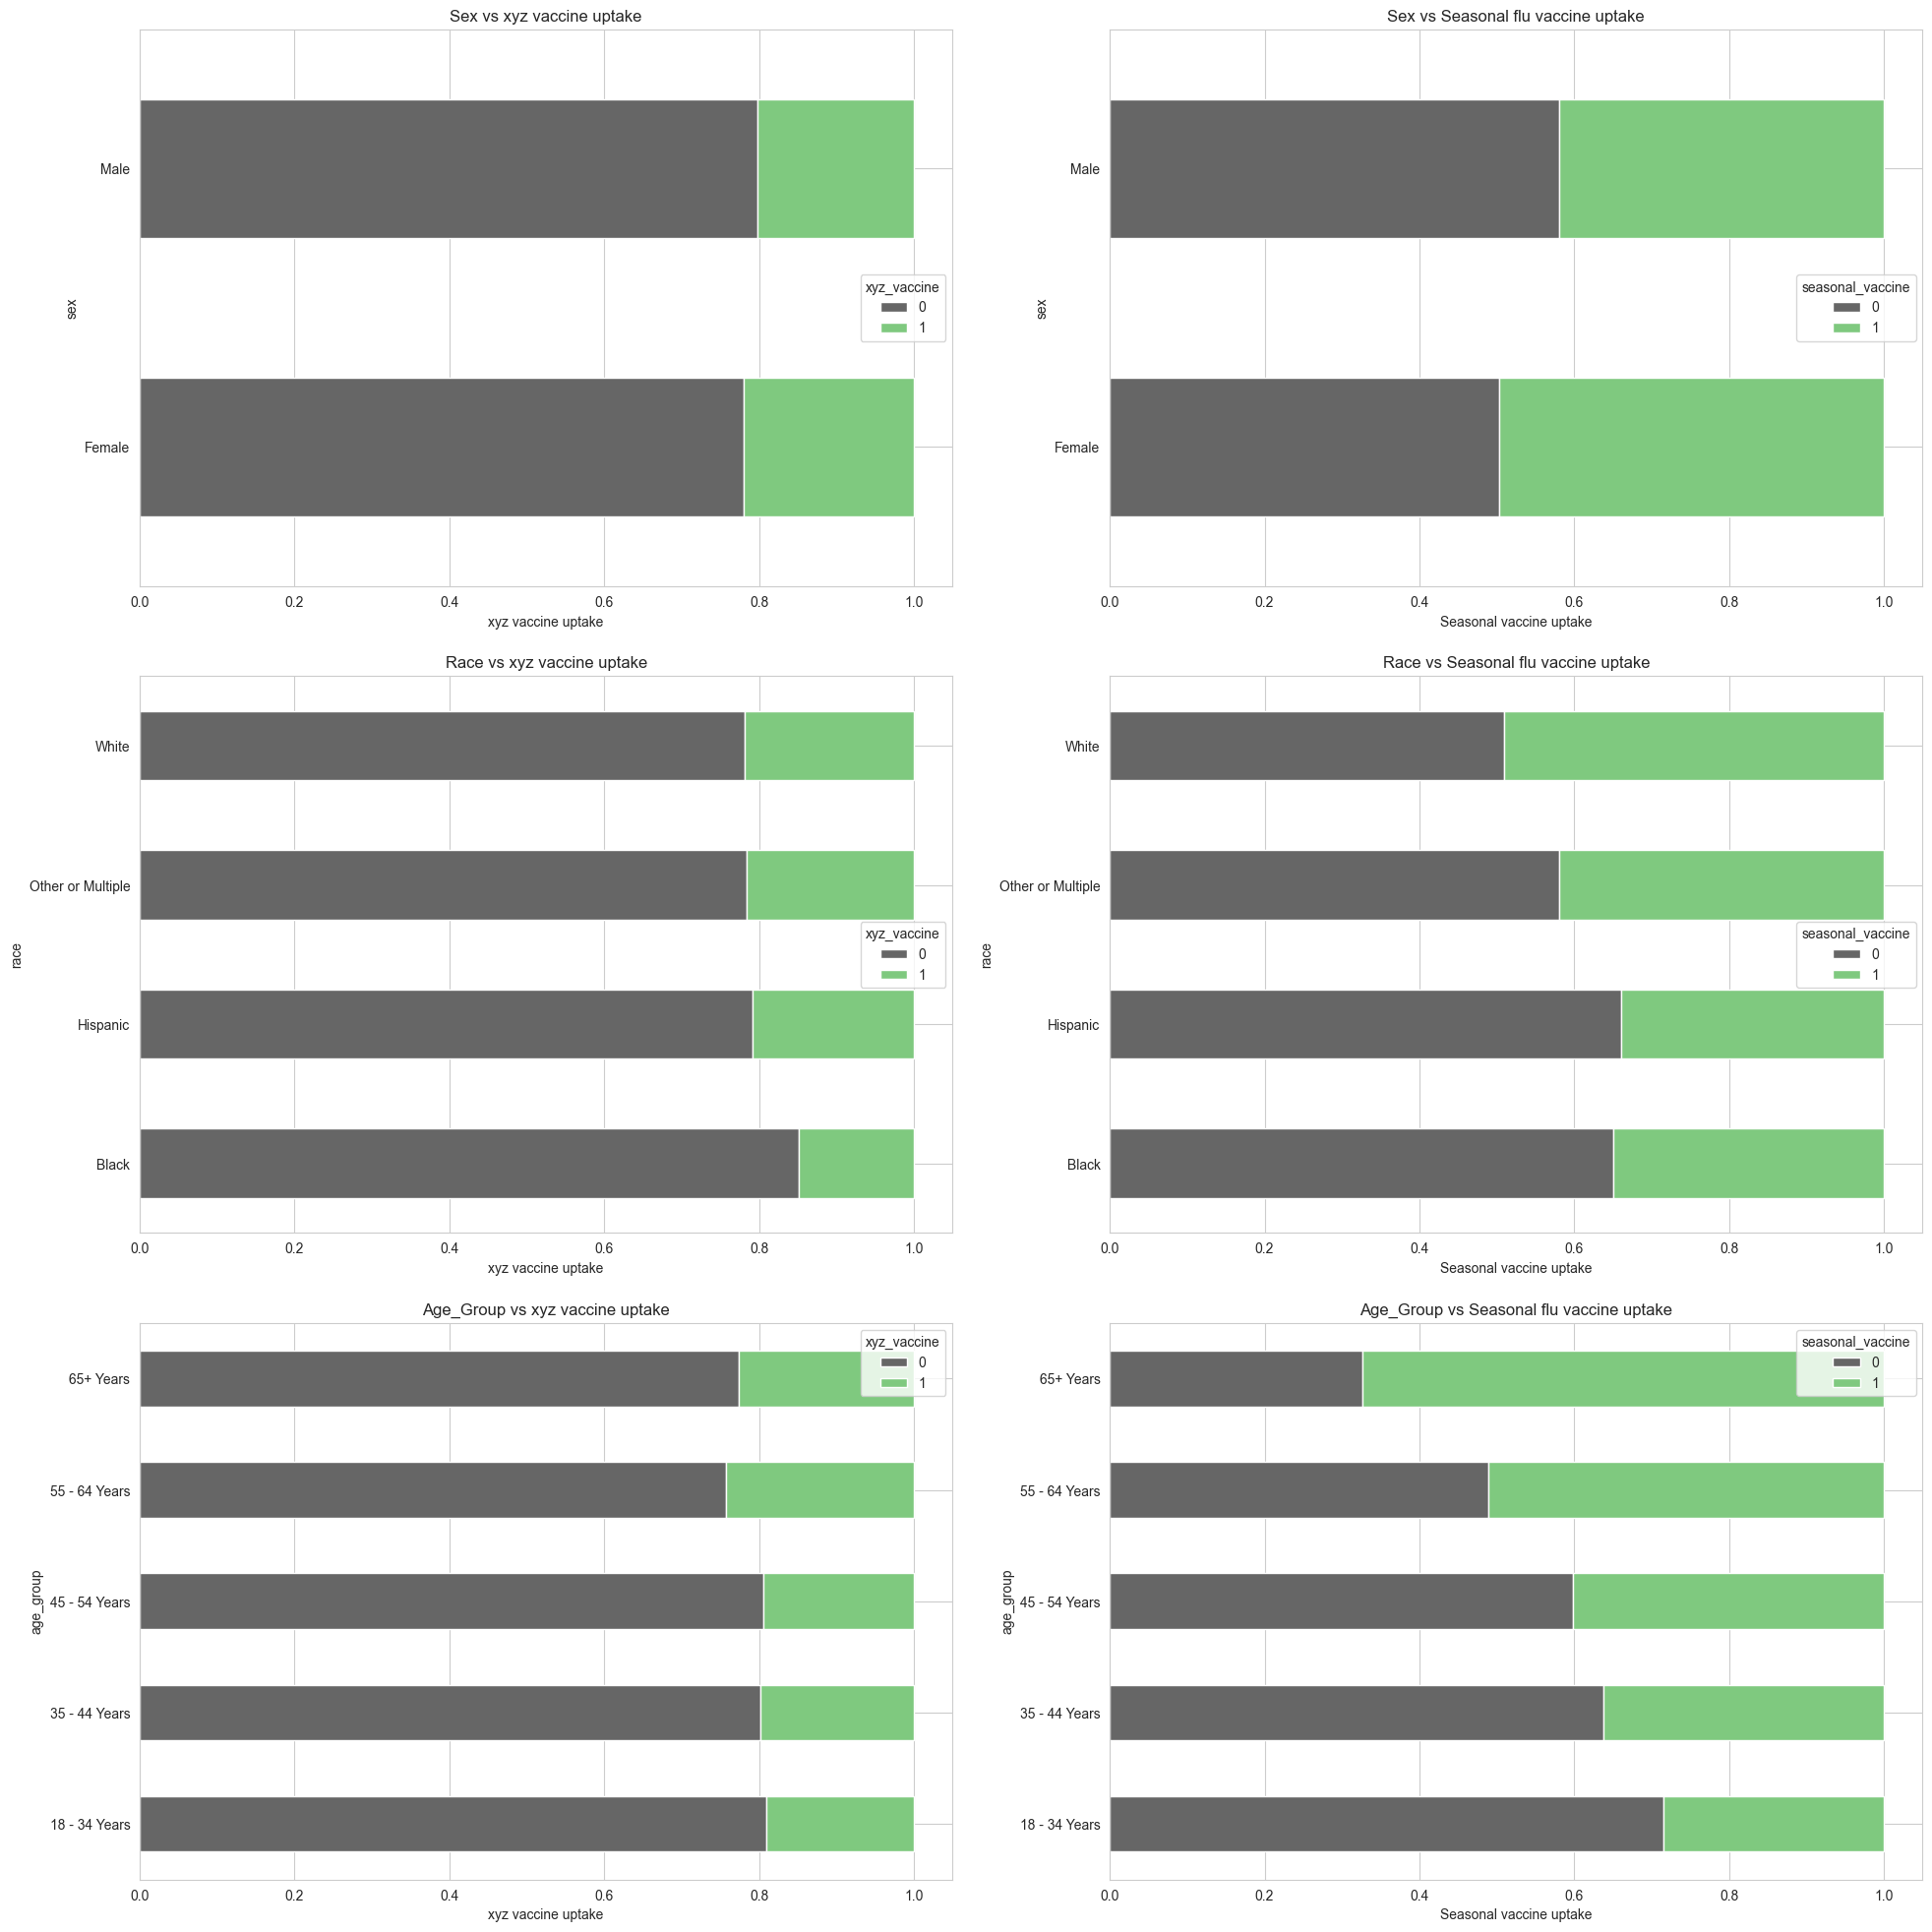

In [15]:
fig,axes = plt.subplots(figsize = (20,20),ncols = 2,nrows = 3)
to_plot = ["sex","race","age_group"]

for idx,col in enumerate(to_plot):
    left_ax = axes[idx,0]
    right_ax = axes[idx,1]

    crosstab1 = pd.crosstab(data[col],data['xyz_vaccine'],normalize="index")
    crosstab1.plot(kind = "barh",stacked = True,colormap=my_cmap,ax = left_ax)
    crosstab2 = pd.crosstab(data[col],data['seasonal_vaccine'],normalize="index")
    crosstab2.plot(kind = "barh",stacked = True,colormap=my_cmap,ax = right_ax)
    left_ax.set_xlabel("xyz vaccine uptake")
    right_ax.set_xlabel("Seasonal vaccine uptake")
    left_ax.set_title(f"{col.title()} vs xyz vaccine uptake")
    right_ax.set_title(f"{col.title()} vs Seasonal flu vaccine uptake")

fig.tight_layout(pad=2);

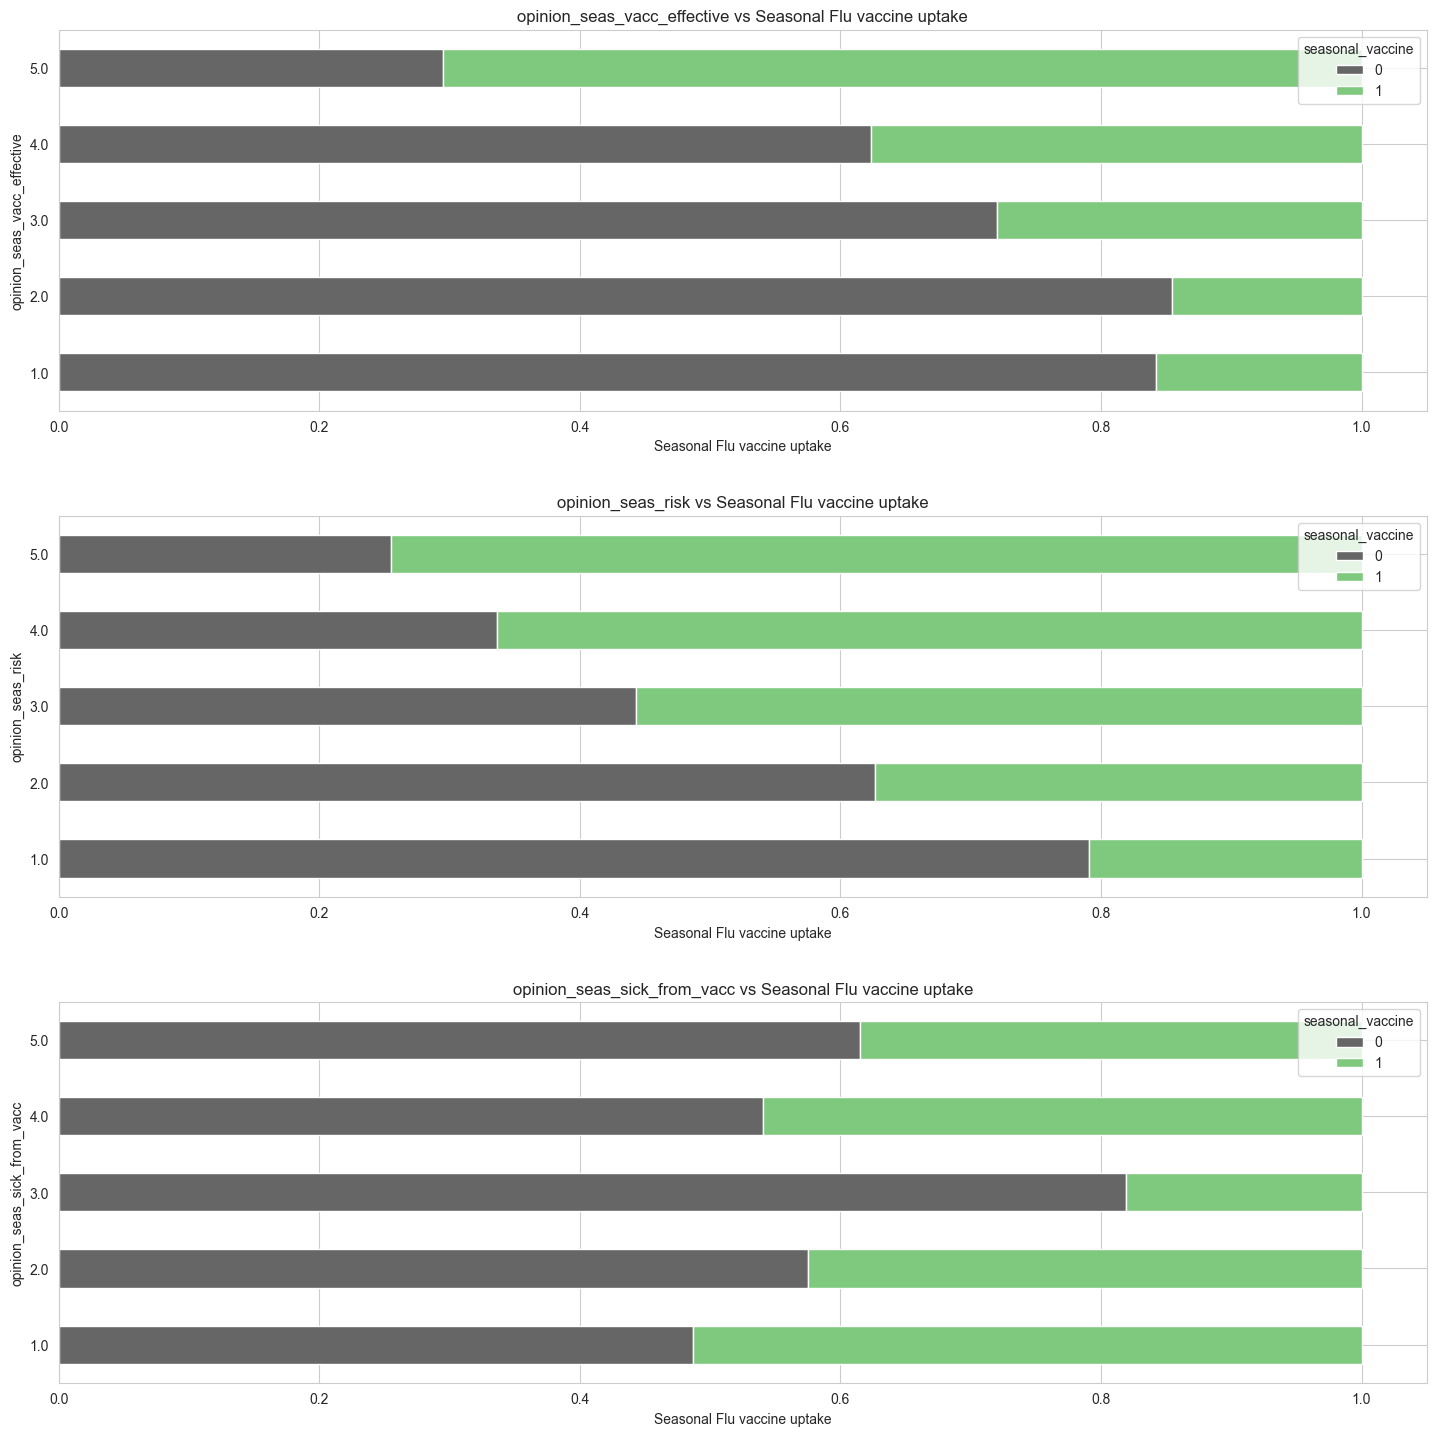

In [16]:
fig,axes = plt.subplots(figsize = (15,15),nrows = 3)
features_to_plot = ['opinion_seas_vacc_effective','opinion_seas_risk','opinion_seas_sick_from_vacc',]

for idx,col in enumerate(features_to_plot):
    ax = axes[idx]
    crosstab1 = pd.crosstab(data[col],data['seasonal_vaccine'],normalize="index")
    crosstab1.plot(kind = "barh",stacked = True,colormap=my_cmap,ax = ax)
    ax.set_xlabel("Seasonal Flu vaccine uptake")
    ax.set_title(f"{col} vs Seasonal Flu vaccine uptake")

fig.tight_layout(pad=3);

In [17]:
X_train = data.drop(["seasonal_vaccine","xyz_vaccine"],axis=1)
y1_train= data.xyz_vaccine
y2_train = data.seasonal_vaccine
X_test= pd.read_csv("test_set_features.csv",index_col = "respondent_id")

In [18]:
X_train.isnull().sum()

xyz_concern                       92
xyz_knowledge                    116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_xyz                 2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_xyz_vacc_effective       391
opinion_xyz_risk                 388
opinion_xyz_sick_from_vacc       395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

In [19]:
##Handeling missing Values

In [20]:
X_train.loc[(X_train['age_group']>= '65+')& (X_train['employment_status'].isna()), 'employment_status'] = 'Unemployed'

In [21]:
X_test.loc[(X_test['age_group']>= '65+')& (X_test['employment_status'].isna()), 'employment_status'] = 'Unemployed'

In [22]:
# Fill NaN values in 'employment_status' where 'education' < 12 Years
X_train.loc[(X_train['education'] == '< 12 Years') & (X_train['employment_status'].isna()), 'employment_status'] = 'Unemployed'

In [23]:
# Fill NaN values in 'employment_status' where 'education' < 12 Years
X_test.loc[(X_test['education'] == '< 12 Years') & (X_test['employment_status'].isna()), 'employment_status'] = 'Unemployed'

In [24]:
X_train.loc[(X_train['education'] == 'College Graduate') & (X_train['employment_status'].isna()), 'employment_status'] = 'Employed'

In [25]:
X_test.loc[(X_test['education'] == 'College Graduate') & (X_test['employment_status'].isna()), 'employment_status'] = 'Employed'

In [26]:
X_train.loc[(X_train['education'] == '< 12 Years') & (X_train['income_poverty'].isna()), 'income_poverty'] = 'Below Poverty'
X_train.loc[(X_train['education'] == 'College Graduate') & (X_train['income_poverty'].isna()), 'income_poverty'] = '> $75,000'
X_train.loc[(X_train['education'] == '12 Years') & (X_train['income_poverty'].isna()), 'income_poverty'] = '<= $75,000, Above Poverty'
X_train.loc[(X_train['education'] == 'Some College') & (X_train['income_poverty'].isna()), 'income_poverty'] = '<= $75,000, Above Poverty'

In [27]:
X_test.loc[(X_test['education'] == '< 12 Years') & (X_test['income_poverty'].isna()), 'income_poverty'] = 'Below Poverty'
X_test.loc[(X_test['education'] == 'College Graduate') & (X_test['income_poverty'].isna()), 'income_poverty'] = '> $75,000'
X_test.loc[(X_test['education'] == '12 Years') & (X_test['income_poverty'].isna()), 'income_poverty'] = '<= $75,000, Above Poverty'
X_test.loc[(X_test['education'] == 'Some College') & (X_test['income_poverty'].isna()), 'income_poverty'] = '<= $75,000, Above Poverty'

In [28]:
X_train.loc[(X_train['age_group']!='18 - 34 Years')& (X_train['marital_status'].isna()),'marital_status']= 'Married'
X_train.loc[(X_train['age_group']=='18 - 34 Years')& (X_train['marital_status'].isna()),'marital_status']= 'Not Married'

In [29]:
X_test.loc[(X_test['age_group']!='18 - 34 Years')& (X_test['marital_status'].isna()),'marital_status']= 'Married'
X_test.loc[(X_test['age_group']=='18 - 34 Years')& (X_test['marital_status'].isna()),'marital_status']= 'Not Married'

In [30]:
# instantiating a SimpleImputer to fill missing data with their modes
from sklearn.impute import SimpleImputer
imputer_fill = SimpleImputer(strategy = "most_frequent",missing_values = np.nan)
cols_to_fill = ["income_poverty","doctor_recc_xyz","doctor_recc_seasonal","education","health_insurance","health_worker"]

# fitting and transforming on the train data then reassigning 
X_train[cols_to_fill] = imputer_fill.fit_transform(X_train[cols_to_fill])

# transforming test data
X_test[cols_to_fill] = imputer_fill.transform(X_test[cols_to_fill])

In [31]:
X_train.drop(columns=['employment_occupation', 'employment_industry', 'hhs_geo_region'], inplace=True)
X_test.drop(columns=['employment_occupation', 'employment_industry', 'hhs_geo_region'], inplace=True)

In [32]:
# dropping rows with null values
X_train.dropna(inplace=True)
X_test.dropna(inplace=True)

In [33]:
# checking for any null values in the train and test set
print("Number of null values in train data:",X_train.isnull().sum().sum(),"\n")
print("Number of null values in test data:",X_test.isnull().sum().sum())

Number of null values in train data: 0 

Number of null values in test data: 0


In [34]:
X_train.shape

(23667, 32)

In [35]:
X_test.shape

(23689, 32)

In [36]:
y_test=pd.read_csv('submission_format.csv', index_col = "respondent_id")

In [37]:
y_test.head()

,xyz_vaccine,seasonal_vaccine
respondent_id,,
26707,0.5,0.7
26708,0.5,0.7
26709,0.5,0.7
26710,0.5,0.7
26711,0.5,0.7


In [38]:
y1_test=y_test.xyz_vaccine
y2_test=y_test.seasonal_vaccine

In [39]:
# identifying indices to drop
set1 = set(y1_test.index) 
set2 = set(X_test.index)
set3 = set(y1_train.index)
set4 = set(X_train.index)

index_to_drop_test = list(set1-set2)
index_to_drop_train = list(set3-set4)

In [40]:
# identifying indices to drop
set1 = set(y2_test.index) 
set2 = set(X_test.index)
set3 = set(y2_train.index)
set4 = set(X_train.index)

index_to_drop_test = list(set1-set2)
index_to_drop_train = list(set3-set4)

In [41]:
#dropping those rows
y1_test = y1_test.drop(index_to_drop_test)
y1_train = y1_train.drop(index_to_drop_train)

In [42]:
#dropping those rows
y2_test = y2_test.drop(index_to_drop_test)
y2_train = y2_train.drop(index_to_drop_train)

In [43]:
# asserting the change
assert len(y1_test) == len(X_test)
assert len(y1_train) == len(X_train)

In [44]:
# asserting the change
assert len(y2_test) == len(X_test)
assert len(y2_train) == len(X_train)

In [45]:
# Print the lengths to identify where the issue is
print(f"len(y1_test): {len(y1_test)}")
print(f"len(X_test): {len(X_test)}")
print(f"len(y1_train): {len(y1_train)}")
print(f"len(X_train): {len(X_train)}")

len(y1_test): 23689
len(X_test): 23689
len(y1_train): 23667
len(X_train): 23667


In [46]:
# Print the lengths to identify where the issue is
print(f"len(y2_test): {len(y2_test)}")
print(f"len(X_test): {len(X_test)}")
print(f"len(y2_train): {len(y2_train)}")
print(f"len(X_train): {len(X_train)}")

len(y2_test): 23689
len(X_test): 23689
len(y2_train): 23667
len(X_train): 23667


In [47]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23667 entries, 0 to 26706
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   xyz_concern                  23667 non-null  float64
 1   xyz_knowledge                23667 non-null  float64
 2   behavioral_antiviral_meds    23667 non-null  float64
 3   behavioral_avoidance         23667 non-null  float64
 4   behavioral_face_mask         23667 non-null  float64
 5   behavioral_wash_hands        23667 non-null  float64
 6   behavioral_large_gatherings  23667 non-null  float64
 7   behavioral_outside_home      23667 non-null  float64
 8   behavioral_touch_face        23667 non-null  float64
 9   doctor_recc_xyz              23667 non-null  object 
 10  doctor_recc_seasonal         23667 non-null  object 
 11  chronic_med_condition        23667 non-null  float64
 12  child_under_6_months         23667 non-null  float64
 13  health_worker        

In [48]:
# assigning columns with float datatype to a variable
float_cols = X_train.select_dtypes(["float","int"]).columns

# for loop to convert datatype to category
for col in float_cols:
    X_train[col] = X_train[col].astype("category")
    X_test[col] = X_test[col].astype("category")

print(X_train.dtypes.value_counts(),"\n")
print(X_test.dtypes.value_counts()  ) 

object      13
category     9
category     6
category     3
category     1
Name: count, dtype: int64 

object      13
category     9
category     6
category     3
category     1
Name: count, dtype: int64


In [49]:
# one hot encoding the columns
X_train_one_hot = pd.get_dummies(X_train,drop_first=True)
X_test_one_hot = pd.get_dummies(X_test,drop_first=True)

In [50]:
X_train_one_hot.shape

(23667, 67)

In [51]:
X_test_one_hot.shape

(23689, 67)

In [52]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score,ConfusionMatrixDisplay,classification_report
from sklearn.feature_selection import RFECV

In [53]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import cross_val_score

In [54]:
model1=LogisticRegression()

In [55]:
model2=LogisticRegression()

In [56]:
model1.fit(X_train_one_hot, y1_train)

LogisticRegression()

In [57]:
model2.fit(X_train_one_hot, y2_train)

LogisticRegression()

In [58]:
# generating predictions for train and test data
y1_train_pred = model1.predict(X_train_one_hot)
y1_test_pred = model1.predict(X_test_one_hot)

In [59]:
# generating predictions for train and test data
y2_train_pred = model2.predict(X_train_one_hot)
y2_test_pred = model2.predict(X_test_one_hot)

In [60]:
#performing cross-validation
cross_val1 = cross_val_score(model1,X_train_one_hot,y1_train,cv = 10)


In [61]:
#performing cross-validation
cross_val2 = cross_val_score(model2,X_train_one_hot,y2_train,cv = 10)


In [62]:
 #printing accuracy
print(f"Train Accuracy: {round(accuracy_score(y1_train,y1_train_pred)*100,4)}%")
print(f"Cross Validation Accuracy: {round(cross_val1.mean()*100,4)}%")

Train Accuracy: 83.7876%
Cross Validation Accuracy: 83.665%


In [63]:
 #printing accuracy
print(f"Train Accuracy: {round(accuracy_score(y2_train,y2_train_pred)*100,4)}%")
print(f"Cross Validation Accuracy: {round(cross_val2.mean()*100,4)}%")

Train Accuracy: 78.3876%
Cross Validation Accuracy: 78.189%


In [64]:
y1_test_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [65]:
y1_test_prob=model1.predict_proba(X_test_one_hot)[:, 1]

In [66]:
y2_test_pred

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [67]:
y2_test_prob=model2.predict_proba(X_test_one_hot)[:, 1]

In [68]:
y1_test_prob

array([0.08361155, 0.03324114, 0.47173062, ..., 0.14942339, 0.07321856,
       0.514418  ])

In [69]:
y2_test_prob

array([0.27458282, 0.02721772, 0.77195907, ..., 0.24757242, 0.36712368,
       0.559554  ])

In [70]:
respondent_ids = X_test_one_hot.index

In [71]:
# Create the submission DataFrame
submission = pd.DataFrame({
    'respondent_id': respondent_ids,
    'xyz_vaccine': y1_test_prob,
    'seasonal_vaccine': y2_test_prob
})

In [72]:
submission.to_csv('submission1.csv', index=False)

In [73]:
sub=pd.read_csv('submission1.csv')

In [74]:
sub.head()

,respondent_id,xyz_vaccine,seasonal_vaccine
0,26707,0.083612,0.274583
1,26708,0.033241,0.027218
2,26709,0.471731,0.771959
3,26710,0.411382,0.856429
4,26711,0.224503,0.377469


In [75]:
sub.tail()

,respondent_id,xyz_vaccine,seasonal_vaccine
23684,53409,0.044241,0.156498
23685,53411,0.074866,0.222957
23686,53412,0.149423,0.247572
23687,53413,0.073219,0.367124
23688,53414,0.514418,0.559554


In [76]:
sub.isnull().sum()

respondent_id       0
xyz_vaccine         0
seasonal_vaccine    0
dtype: int64

In [78]:
from sklearn.naive_bayes import GaussianNB

In [79]:
# Define the Naive Bayes models
nb_xyz_vaccine = GaussianNB()
nb_seasonal_vaccine = GaussianNB()

In [80]:
# Fit the models
nb_xyz_vaccine.fit(X_train_one_hot, y1_train)
nb_seasonal_vaccine.fit(X_train_one_hot, y2_train)

GaussianNB()

In [81]:
xyz_vaccine_probs = nb_xyz_vaccine.predict_proba(X_test_one_hot)[:, 1]
seasonal_vaccine_probs = nb_seasonal_vaccine.predict_proba(X_test_one_hot)[:, 1]

In [82]:
xyz_vaccine_predict = nb_xyz_vaccine.predict(X_test_one_hot)
seasonal_vaccine_predict = nb_seasonal_vaccine.predict(X_test_one_hot)

In [83]:
xyz_vaccine_predict

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [84]:
xyz_vaccine_probs

array([6.87469993e-01, 1.45752089e-06, 9.99862075e-01, ...,
       3.64893886e-06, 9.98563789e-13, 9.71304598e-01])

In [85]:
y1_train_pred = nb_xyz_vaccine.predict(X_train_one_hot)

In [86]:
print(f"Train Accuracy: {round(accuracy_score(y1_train,y1_train_pred)*100,4)}%")

Train Accuracy: 70.7356%


In [87]:
y2_train_pred = nb_seasonal_vaccine.predict(X_train_one_hot)

In [88]:
print(f"Train Accuracy: {round(accuracy_score(y2_train,y2_train_pred)*100,4)}%")

Train Accuracy: 71.775%


In [89]:
# Extract respondent_ids from the index of X_test
respondent_ids = X_test_one_hot.index

# Create the submission DataFrame
submission = pd.DataFrame({
    'respondent_id': respondent_ids,
    'xyz_vaccine': xyz_vaccine_probs,
    'seasonal_vaccine': seasonal_vaccine_probs
})

In [90]:
submission.to_csv('submission2.csv', index=False)

Using Support Vector Machines

In [91]:
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV

In [92]:
#Define the SVM models
svm_xyz_vaccine = SVC(kernel='linear')
svm_xyz_vaccine.probability=True

# Fit the models
svm_xyz_vaccine.fit(X_train_one_hot, y1_train)

SVC(kernel='linear', probability=True)

In [93]:
svm_seasonal_vaccine = SVC(kernel='linear')
svm_seasonal_vaccine.probability=True

#fit
svm_seasonal_vaccine.fit(X_train_one_hot, y2_train)

SVC(kernel='linear', probability=True)

In [94]:
svm_xyz_vaccine.predict(X_test_one_hot)

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [95]:
xyz_vaccine_probs=svm_xyz_vaccine.predict_proba(X_test_one_hot)[:, 1]

In [96]:
seasonal_vaccine_probs=svm_seasonal_vaccine.predict_proba(X_test_one_hot)[:, 1]

In [97]:
respondent_ids = X_test_one_hot.index

# Create the submission DataFrame
submission = pd.DataFrame({
    'respondent_id': respondent_ids,
    'xyz_vaccine': xyz_vaccine_probs,
    'seasonal_vaccine': seasonal_vaccine_probs
})

In [98]:
# Save to CSV
submission.to_csv('submission3.csv', index=False)

In [100]:
y1_train_pred_svc = svm_xyz_vaccine.predict(X_train_one_hot)

In [101]:
print(f"Train Accuracy: {round(accuracy_score(y1_train,y1_train_pred_svc)*100,4)}%")

Train Accuracy: 83.4242%


In [102]:
y2_train_pred_svc = nb_seasonal_vaccine.predict(X_train_one_hot)

In [103]:
print(f"Train Accuracy: {round(accuracy_score(y2_train,y2_train_pred_svc)*100,4)}%")

Train Accuracy: 71.775%


Done By- Anmol Gupta
